# Titanic Data Set - EDA on Train dataset

Problem statement: To predict if a given passenger has survived or not

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading CSV file
data = pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\NPTEL\Datasets\Titanic_train_data.csv")

In [3]:
# Seeing the original dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Variable names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
# Renaming variable names for convenience
data.rename(columns={"Pclass":"Passenger_class"}, inplace = True)
data.rename(columns={"SibSp":"Siblings_spouse"}, inplace = True)
data.rename(columns={"PassengerId":"Passenger_Id"}, inplace = True)
data.rename(columns={"Parch":"Parent_child"}, inplace = True)

In [53]:
# Checking the modified dataset
data.head(2)

,Passenger_Id,Survived,Passenger_class,Name,Sex,Age,Siblings_spouse,Parent_child,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [36]:
# The shape of the dataset
data.shape

(891, 12)

In [37]:
# Knowing data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passenger_Id     891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Passenger_class  891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   Siblings_spouse  891 non-null    int64  
 7   Parent_child     891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# Summary Stats.
data.describe()

,Passenger_Id,Survived,Passenger_class,Age,Siblings_spouse,Parent_child,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
data.isnull().sum()

Passenger_Id         0
Survived             0
Passenger_class      0
Name                 0
Sex                  0
Age                177
Siblings_spouse      0
Parent_child         0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

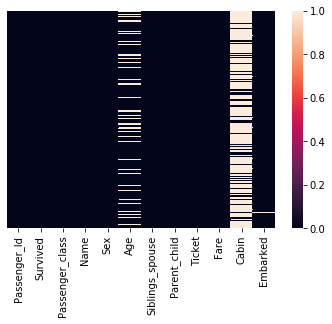

In [52]:
# Visual representation of the missing values using heatmap
sns.heatmap(data.isnull(), yticklabels=False) # Not showing the vales in y-axis

Missing values are found to be in "Age" and "Cabin". Statistical techniques must be used to impute values.The missing values in "Age" is comparitively lower that the "cabin" data, therefore the missing "Age" data can replaced with some form of impuation. However, the "cabin" column has more unknowns to perform techniques. So, we would probably drop this or manuplate the column as known and unknown as 0s and 1s.

In [64]:
# Knowing the number of people survived and didn't survive
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

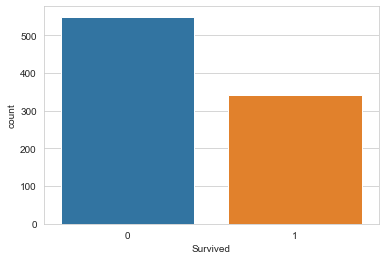

In [65]:
# Visualizing the survival status
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data)

We infer that more than 500 people have been killed in the accident

In [66]:
data.columns

Index(['Passenger_Id', 'Survived', 'Passenger_class', 'Name', 'Sex', 'Age',
       'Siblings_spouse', 'Parent_child', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

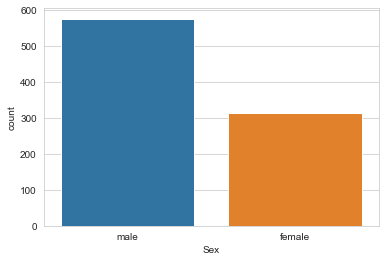

In [67]:
# Visualizing the count of male and female passengers
sns.set_style("whitegrid")
sns.countplot(x="Sex",data=data)

We infer that male passengers were close to double that of the female passengers

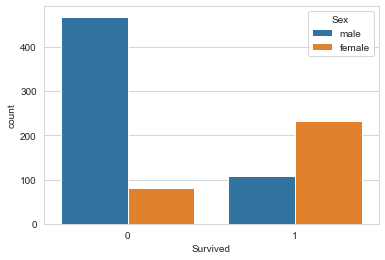

In [70]:
# # Visualizing the survival status grouped by gender
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=data)

We infer that close to 500 males have died which is significantly higher than the females, less than 100

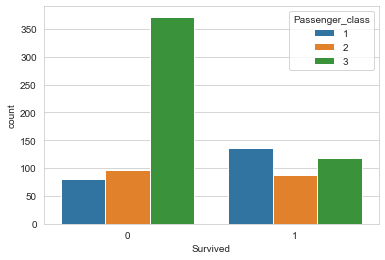

In [74]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Passenger_class",data=data)

In [81]:
# Knowing the number of 3rd class passengers
len(data[data["Passenger_class"] == 3])

491

We can infer that the out of 491 third class passengers only around 100 passengers mangaed to survive, compared to the 1st and 2nd class

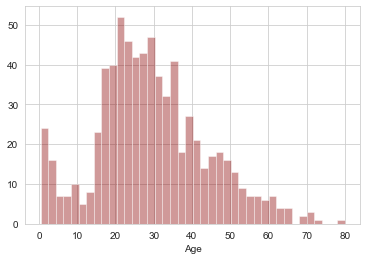

In [97]:
# Visualizing the distribution of age of passengers with distribution plot
sns.distplot(data["Age"].dropna(),kde= False,bins=40,color="darkred")

We can infer that most of the passengers were aged between 20 and 30

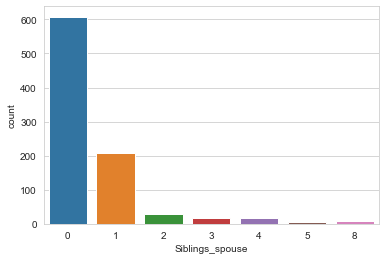

In [98]:
sns.countplot(x="Siblings_spouse",data=data)

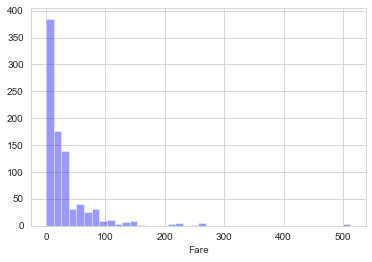

In [106]:
# Visualizing the passenger fares
sns.distplot(data["Fare"],kde=False,color="b",bins=40)

In [107]:
# Calculating mean fare
data.Fare.mean()

32.2042079685746

We can see that the average fare is somewhere around 40 from the distribution plot

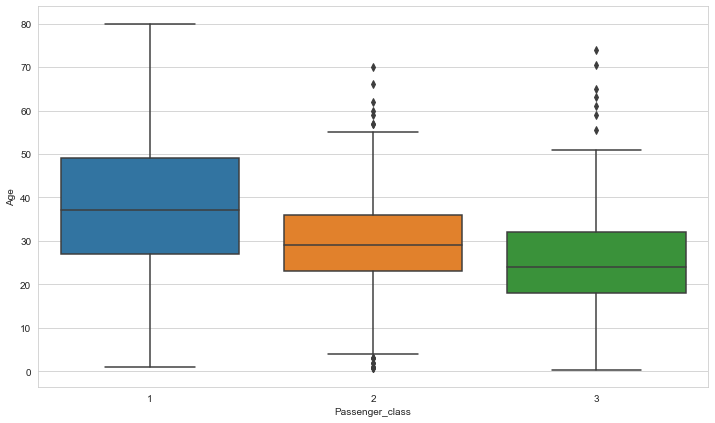

In [111]:
# Visualizing and finding the relationship between age and passenger class
plt.figure(figsize=(12,7))
sns.boxplot(x="Passenger_class",y="Age",data=data)

We can infer that most of the mid aged people were travelling in the 1st class.
The mendian age of 1st, 2nd and 3rd clasess are 37, 29 and 24 respectively, we can use this data to fill in the missing values under "Age" column

In [166]:
# Defining a function to fill in the null values in Age column
def impute_age(cols):
    age_column = cols[0]
    pass_class_column = cols[1]
    
    if pd.isnull(age_column):       #The empty cells will be filled with the respective medians found from the above boxplot if the cell is null
        if pass_class_column == 1:
            return 37               #Median age of 1st class passengers
        elif pass_class_column == 2:    
            return 29               #Median age of 2nd class passengers
        else:
            return 24               #Median age of 3rd class passengers
    else:
        return age_column           #Return the existing age if the age cell has some value

In [167]:
data["Age"] = data[["Age","Passenger_class"]].apply(impute_age,axis = 1)

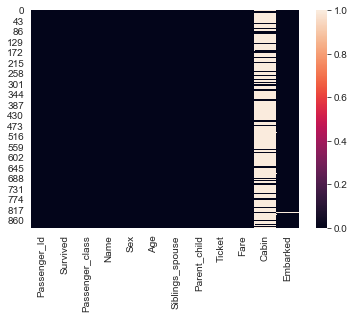

In [169]:
#Checking the null values with heatmap
sns.heatmap(data.isnull())

The null values under age are filled by the respective medians

In [171]:
# Dropping the cabin column as it contains more null values
data.drop(columns="Cabin",axis=1,inplace=True)

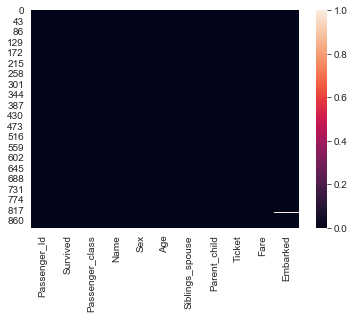

In [172]:
# Checking
sns.heatmap(data.isnull())

In [173]:
# Checking dataframe 
data.head()

,Passenger_Id,Survived,Passenger_class,Name,Sex,Age,Siblings_spouse,Parent_child,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [176]:
# Converting categorical data, Embarked into indicator variables and seeing
pd.get_dummies(data["Embarked"], drop_first=True).head() # Dropping the first column as we know it's value from the other 2 columns

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [179]:
# Converting categorical data,into indicator variables and savings them into variables
sex = pd.get_dummies(data["Sex"],drop_first = True)
embark = pd.get_dummies(data["Embarked"],drop_first = True)

In [181]:
# Dropping the columns that won't be of any use
data.drop(columns=["Sex","Name","Embarked","Ticket"],axis=1,inplace=True)

In [182]:
# Checking
data.head()

,Passenger_Id,Survived,Passenger_class,Age,Siblings_spouse,Parent_child,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [183]:
# Appending columns (Sex, embark) into the dataframe
data = pd.concat([data,sex,embark],axis=1)

In [184]:
# Checking the dataframe after concatination
data.head()

,Passenger_Id,Survived,Passenger_class,Age,Siblings_spouse,Parent_child,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now the data is ready for applying suitable ML model for prediction